<a href="https://colab.research.google.com/github/aloml2543/KB_OCR/blob/main/src/model2_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install hangul_utils
import numpy as np
from PIL import ImageFont, ImageDraw, Image
import cv2
import os
import random
from google.colab.patches import cv2_imshow
from hangul_utils import split_syllables, join_jamos


class hangle_hanza():
  def __init__(self):
    !unzip -n "/content/drive/MyDrive/KB_OCR/model2/Font2.zip"  -d '/content/Font/'
    self.charecter = '''0123456789abcdefghijklmnopqrstuvwxyz가각간갇갈감갑값갓강갖같갚갛개객걀걔거걱건걷걸검겁것겉게겨격겪견결겹경곁계고곡곤곧골곰곱곳공과관광괜괴굉교구국군굳굴굵굶굽궁권귀귓규균귤그극근글긁금급긋긍기긴길김깅깊까깍깎깐깔깜깝깡깥깨꺼꺾껌껍껏껑께껴꼬꼭꼴꼼꼽꽂꽃꽉꽤꾸꾼꿀꿈뀌끄끈끊끌끓끔끗끝끼낌나낙낚난날낡남납낫낭낮낯낱낳내냄냇냉냐냥너넉넌널넓넘넣네넥넷녀녁년념녕노녹논놀놈농높놓놔뇌뇨누눈눕뉘뉴늄느늑는늘늙능늦늬니닐님다닥닦단닫달닭닮담답닷당닿대댁댐댓더덕던덜덟덤덥덧덩덮데델도독돈돌돕돗동돼되된두둑둘둠둡둥뒤뒷드득든듣들듬듭듯등디딩딪따딱딴딸땀땅때땜떠떡떤떨떻떼또똑뚜뚫뚱뛰뜨뜩뜯뜰뜻띄라락란람랍랑랗래랜램랫략량러럭런럴럼럽럿렁렇레렉렌려력련렬렵령례로록론롬롭롯료루룩룹룻뤄류륙률륭르른름릇릎리릭린림립릿링마막만많말맑맘맙맛망맞맡맣매맥맨맵맺머먹먼멀멈멋멍멎메멘멩며면멸명몇모목몬몰몸몹못몽묘무묵묶문묻물뭄뭇뭐뭘뭣므미민믿밀밉밌및밑바박밖반받발밝밟밤밥방밭배백뱀뱃뱉버번벌범법벗베벤벨벼벽변별볍병볕보복볶본볼봄봇봉뵈뵙부북분불붉붐붓붕붙뷰브븐블비빌빔빗빚빛빠빡빨빵빼뺏뺨뻐뻔뻗뼈뼉뽑뿌뿐쁘쁨사삭산살삶삼삿상새색샌생샤서석섞선설섬섭섯성세섹센셈셋셔션소속손솔솜솟송솥쇄쇠쇼수숙순숟술숨숫숭숲쉬쉰쉽슈스슨슬슴습슷승시식신싣실싫심십싯싱싶싸싹싼쌀쌍쌓써썩썰썹쎄쏘쏟쑤쓰쓴쓸씀씌씨씩씬씹씻아악안앉않알앓암압앗앙앞애액앨야약얀얄얇양얕얗얘어억언얹얻얼엄업없엇엉엊엌엎에엔엘여역연열엷염엽엿영옆예옛오옥온올옮옳옷옹와완왕왜왠외왼요욕용우욱운울움웃웅워원월웨웬위윗유육율으윽은을음응의이익인일읽잃임입잇있잊잎자작잔잖잘잠잡잣장잦재쟁쟤저적전절젊점접젓정젖제젠젯져조족존졸좀좁종좋좌죄주죽준줄줌줍중쥐즈즉즌즐즘증지직진질짐집짓징짙짚짜짝짧째쨌쩌쩍쩐쩔쩜쪽쫓쭈쭉찌찍찢차착찬찮찰참찻창찾채책챔챙처척천철첩첫청체쳐초촉촌촛총촬최추축춘출춤춥춧충취츠측츰층치칙친칠침칫칭카칸칼캄캐캠커컨컬컴컵컷케켓켜코콘콜콤콩쾌쿄쿠퀴크큰클큼키킬타탁탄탈탑탓탕태택탤터턱턴털텅테텍텔템토톤톨톱통퇴투툴툼퉁튀튜트특튼튿틀틈티틱팀팅파팎판팔팝패팩팬퍼퍽페펜펴편펼평폐포폭폰표푸푹풀품풍퓨프플픔피픽필핏핑하학한할함합항해핵핸햄햇행향허헌험헤헬혀현혈협형혜호혹혼홀홈홉홍화확환활황회획횟횡효후훈훌훔훨휘휴흉흐흑흔흘흙흡흥흩희흰히힘?!'''
    self.font_dir = '/content/Font/'
    self.font_list = os.listdir(self.font_dir)
    try:
      self.font_list.remove('.ipynb_checkpoints')
    except:
      pass

  def ri(self, x, y):
    return random.randint(x,y)
  

  def find_crop_size(self, img, color):
    hor_set = set()
    ver_set = set()
    for f in range(img.shape[0]):
      for s in range(img.shape[1]):
        if img[f][s] != color:
          hor_set.add(f)
          ver_set.add(s)
    if len(ver_set) == 0:
      return 1
    right, left, down, up = max(ver_set), min(ver_set), max(hor_set), min(hor_set)
    margin = 5
    crop_img = img[up-margin:down+margin, left-margin: right+margin].copy()
    return crop_img


  def generate_K_img(self, size=True, color=True, length = 1):
    if size:
      r_size = self.ri(10,40)
    else:
      r_size = 50

    if color:
      back_color = (self.ri(0,255))
      text_color = (self.ri(0,255))
    else:
      back_color = (0,0,0)
      text_color = (256,256,256)

    text = random.choice(self.charecter)

    r_font = self.font_dir + random.choice(self.font_list)
    font = ImageFont.truetype(r_font, r_size)
    img = np.full((r_size+50,length*r_size+50), back_color, dtype=np.uint8)
    img = Image.fromarray(img)
    draw = ImageDraw.Draw(img)
    draw.text((15,15), text, font=font, fill=text_color)
    img = np.array(img)
    img=self.find_crop_size(img, back_color)

    return img, text
    
K_img_gen = hangle_hanza()


Archive:  /content/drive/MyDrive/KB_OCR/model2/Font2.zip


In [ ]:
import tensorflow as tf
import matplotlib
import numpy as np
import os
import zipfile
import pandas as pd
from tqdm import tqdm
from pathlib import Path
import pickle
import datetime
import itertools
 
from tensorflow.keras import backend as K
 
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2,preprocess_input
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Input,GlobalMaxPooling2D,Dense, Conv2D, BatchNormalization, Activation, MaxPooling2D, Reshape, LSTM, Lambda, add, concatenate
from tensorflow.keras.models import Model, save_model, load_model
from tensorflow.keras.preprocessing.image import img_to_array,load_img
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
 
import numpy as np
import random
import multiprocessing
from cv2 import resize
from os import path, listdir
from google.colab.patches import cv2_imshow
import cv2
plt = matplotlib.pyplot

 
!python --version
print("tensorflow",tf.__version__)
print("numpy",np.__version__)
print("matplotlib",matplotlib.__version__)

Python 3.7.11
tensorflow 2.6.0
numpy 1.19.5
matplotlib 3.2.2


In [ ]:
characters = []
characters += K_img_gen.charecter

print("문자수", len(characters))
print("앞 20글자", characters[0:20])
print("뒤 20글자", characters[-20:])

model_path = '/content/drive/MyDrive/KB_OCR/model2/'
img_length = 32
num_classes = len(characters) + 1

문자수 1010
앞 20글자 ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
뒤 20글자 ['훌', '훔', '훨', '휘', '휴', '흉', '흐', '흑', '흔', '흘', '흙', '흡', '흥', '흩', '희', '흰', '히', '힘', '?', '!']


In [ ]:
def labels_to_text(labels):     # index형 데이터 -> 글자 변환
    return ''.join(list(map(lambda x: characters[int(x)], labels)))
 
def text_to_labels(text):      # 글자 -> index형 데이터 변환
    return list(map(lambda x: characters.index(x), text))

class TextImageGenerator:
    def __init__(self, K_img_gen, img_length=50, max_length=1):
        self.cur_index = 0
        self.batch_size = 1
        self.img_length = img_length
        self.K_img_gen = K_img_gen
        self.max_length = max_length

    def next_batch(self): 
        while True:
            X_data = np.ones([self.batch_size, self.img_length, self.img_length, 1])
            Y_data = np.zeros([self.batch_size, self.max_length])   
            input_length = np.ones((self.batch_size, 1)) * self.img_length
            label_length = np.zeros((self.batch_size, 1))

            
            img, text = self.K_img_gen.generate_K_img(size=False)
            img = cv2.resize(img, (self.img_length, self.img_length))
            img = img.astype(np.float32)
            img = (img / 255.0)
            img = np.expand_dims(img, -1)

            X_data[0] = img
            letter = text_to_labels(text)
            for point in range(len(letter)):
                Y_data[0][point] = letter[point]
            label_length[0] = len(text)

            # dict 형태로 복사
            inputs = {
                'the_input': X_data,  # (bs, 128, 64, 1)
                'the_labels': Y_data,  # (bs, 8)
                'input_length': input_length,  # (bs, 1) -> 모든 원소 value = 30
                'label_length': label_length  # (bs, 1) -> 모든 원소 value = 8
            }
            outputs = {'ctc': np.zeros([self.batch_size])}   # (bs, 1) -> 모든 원소 0
            yield (inputs, outputs)

img_gen = TextImageGenerator(hangle_hanza(), img_length=img_length)


Archive:  /content/drive/MyDrive/KB_OCR/model2/Font2.zip


In [ ]:
def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
    y_pred = y_pred[:,2:, :]
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)
 
def get_Model(training=True):
    inputs = Input(name='the_input', shape=(img_length, img_length, 1), dtype='float32')
 
    # Convolution layer (VGG)
    inner = Conv2D(64, (3, 3), padding='same', name='conv1', kernel_initializer='he_normal')(inputs)
    inner = BatchNormalization()(inner)
    inner = Activation('relu')(inner)
    inner = MaxPooling2D(pool_size=(2, 2), name='max1')(inner)
 
    inner = Conv2D(128, (3, 3), padding='same', name='conv2', kernel_initializer='he_normal')(inner)
    inner = BatchNormalization()(inner)
    inner = Activation('relu')(inner)
    inner = MaxPooling2D(pool_size=(2, 2), name='max2')(inner)
    inner = Conv2D(256, (3, 3), padding='same', name='conv3', kernel_initializer='he_normal')(inner)
    inner = BatchNormalization()(inner)
    inner = Activation('relu')(inner)
    inner = Conv2D(256, (3, 3), padding='same', name='conv4', kernel_initializer='he_normal')(inner)
    inner = BatchNormalization()(inner)
    inner = Activation('relu')(inner)
    inner = MaxPooling2D(pool_size=(1, 2), name='max3')(inner)
 
    # CNN to RNN
    inner = Reshape(target_shape=((64* 128)), name='reshape')(inner)
    inner = Dense(64, activation='relu', kernel_initializer='he_normal', name='dense1')(inner)
 
    # RNN layer
    lstm_1 = LSTM(256, return_sequences=True, kernel_initializer='he_normal', name='lstm1')(inner)
    lstm_1b = LSTM(256, return_sequences=True, go_backwards=True, kernel_initializer='he_normal', name='lstm1_b')(inner)
    reversed_lstm_1b = Lambda(lambda inputTensor: K.reverse(inputTensor, axes=1)) (lstm_1b)
 
    lstm1_merged = add([lstm_1, reversed_lstm_1b])
    lstm1_merged = BatchNormalization()(lstm1_merged)
 

    inner = Dense(num_classes, kernel_initializer='he_normal',name='dense2')(lstm1_merged)
    y_pred = Activation('softmax', name='softmax')(inner)
 
    labels = Input(name='the_labels', shape=[1], dtype='float32') 
    input_length = Input(name='input_length', shape=[1], dtype='int64')
    label_length = Input(name='label_length', shape=[1], dtype='int64')
 
    loss_out = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([y_pred, labels, input_length, label_length])
 
    if training:
        return Model(inputs=[inputs, labels, input_length, label_length], outputs=loss_out)
    else:
        return Model(inputs=[inputs], outputs=y_pred)

model = get_Model()
model.summary()
model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=Adam())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input (InputLayer)          [(None, 32, 32, 1)]  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 32, 32, 64)   640         the_input[0][0]                  
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 64)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
checkpoint = ModelCheckpoint(filepath=model_path + '{epoch:02d}-{val_loss:.4f}.hdf5', monitor='val_loss', verbose=1, mode='auto', save_best_only=True)

log_dir = model_path + "tensorbloard/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

now = datetime.datetime.now()
print("시작 시간:", now)
while True:
  try:
    history = model.fit(img_gen.next_batch(), steps_per_epoch=90
                        ,validation_data=img_gen.next_batch(), validation_steps=10
                        ,callbacks=[checkpoint, tensorboard_callback]
                        ,epochs=500)
  except:
    pass
now = datetime.datetime.now()
print("종료 시간:", now)

시작 시간: 2021-09-03 16:11:46.910415
Epoch 1/500
 1/90 [..............................] - ETA: 8s - loss: 8.3671

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


90/90 [==============================] - 10s 107ms/step - loss: 7.3285 - val_loss: 62.2488

Epoch 00001: val_loss improved from inf to 62.24885, saving model to /content/drive/MyDrive/KB_OCR/model2/01-62.2488.hdf5
Epoch 2/500
90/90 [==============================] - 10s 108ms/step - loss: 7.2890 - val_loss: 47.9301

Epoch 00002: val_loss improved from 62.24885 to 47.93015, saving model to /content/drive/MyDrive/KB_OCR/model2/02-47.9301.hdf5
Epoch 3/500
90/90 [==============================] - 10s 106ms/step - loss: 7.2893 - val_loss: 53.3546

Epoch 00003: val_loss did not improve from 47.93015
Epoch 4/500
90/90 [==============================] - 10s 106ms/step - loss: 7.3265 - val_loss: 30.1560

Epoch 00001: val_loss improved from 47.93015 to 30.15596, saving model to /content/drive/MyDrive/KB_OCR/model2/01-30.1560.hdf5
Epoch 2/500
90/90 [==============================] - 10s 109ms/step - loss: 7.2048 - val_loss: 18.3792

Epoch 00001: val_loss improved from 30.15596 to 18.37917, saving

...Previous weight data...
시작 시간: 2021-09-03 16:16:25.546585


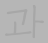

Predicted: 옛너렉z돗김쩐셈쩐슴노되훈싸훈대릿대애켓애 


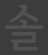

Predicted: 렉발현괴싸괴렉괴목다싸훈돗훈돗대켓대켓릿켓젓 


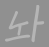

Predicted: 히헬둠촌둠싸렉돗김돗김돗아노되훈대릿애릿켓애켓애 


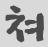

Predicted: zzzz겪z핏겪z겪숟겪숟겪솜유렬릿켓릿켓릿켓꼼 


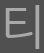

Predicted: 히너벼싸괴목괴목덕노싸훈싸훈끌훈슷릿슷릎켓럿켓젓 


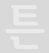

Predicted: zzz핏셈핏셈핏렉덕끼숟솜숟솜숟솜유대릿대릿켓꼼 


Predicted: 온발너렉돗괴솜땜목덕노싸훈싸훈돗훈끌훈대릿켓럿젓 


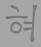

Predicted: 헬촌둠쩐렉돗김돗김돗덕노되훈대릿대애켓애 


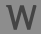

Predicted: 히튼z튼쩐벼돗신목돗목덕노돗훈싸훈슷릿켓릎켓릎켓애 


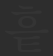

Predicted: 괴z괴z괴z다싸대켓럿켓젓 


In [ ]:
predict_model = get_Model(training=False)
try:
    predict_model.load_weights(model_path + '01-10.1059.hdf5')
    print("...Previous weight data...")
except:
    raise Exception("No weight file!")
 
now = datetime.datetime.now()
print("시작 시간:", now)

def decode_label(out):
    z, x, y = out.shape
    out = np.reshape(out,(int(x*y/num_classes),num_classes))
    word = []
    for letter in out:
      word.append(letter.argmax())
    out_best = [k for k, g in itertools.groupby(word)]
    outstr = ''
    for i in out_best:
        if i < len(characters):
            outstr += characters[i]
    return outstr

for _ in range(10):
    img, text = K_img_gen.generate_K_img(size=False)
    cv2_imshow(img)
 
    img_pred = cv2.resize(img, (img_length, img_length))
    img_pred = img_pred.astype(np.float32)
    img_pred = (img_pred / 255.0)
    img_pred = np.expand_dims(img_pred, axis=-1)
    img_pred = np.expand_dims(img_pred, axis=0)
 
    net_out_value = predict_model.predict(img_pred)
    pred_texts = decode_label(net_out_value)
    print('Predicted: %s ' % (pred_texts))
    